##### Importing necessary libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##### Loading  the data

In [27]:
data=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

###### Basic Checks

In [28]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [29]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [30]:
data.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [31]:
data.shape

(1200, 28)

***observation:
    The dataset contains 1200 observations and 28 attributes***

## Data Preprocessing and Feature engineering

In [32]:
data=data.drop(['EmpNumber'],axis=1)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

In [34]:
data.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

***Observation:There are no null values but since there are features in categorical form we have to convert them to numericals***

In [35]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


***Observation:***

***There are no null and constant values present***

***The avg employee last salary hike percent is 15.22, min hike percent is 11 and max hike percent is 25***

***The min work experience of an employee is 0 and max is 40 years.***

***The min training time last year for an employee was 0 and max was 6 years.***

In [36]:
categorical_col = []#list
for column in data.columns:#for loop to acess columns form dataset
    if data[column].dtype == object and len(data[column].unique()) <= 50:#checking datatype whether datatype is object/string and number of unique label in the columns less than 50 
        categorical_col.append(column)#appending those columns in the list who statisfy the condition 
        print(f"{column} : {data[column].unique()}")#output
        print("====================================")

Gender : ['Male' 'Female']
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus : ['Single' 'Married' 'Divorced']
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime : ['No' 'Yes']
Attrition : ['No' 'Yes']


#### Converting categorical variables into numerical

#### (1) Gender

In [37]:
data.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [38]:
data.Gender=pd.get_dummies(data.Gender,drop_first=True)
data.Gender

0       1
1       1
2       1
3       1
4       1
       ..
1195    0
1196    1
1197    1
1198    0
1199    0
Name: Gender, Length: 1200, dtype: uint8

#### (2)EducationBackground 

In [39]:
data.EducationBackground=data.EducationBackground.map({'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other':1,'Human Resources':0 })

#### (3)EmpDepartment 

In [40]:
data.EmpDepartment=data.EmpDepartment.map({'Research & Development':3,'Sales':5,'Human Resources':2,'Development':4,'Finance':1,'Data Science':0})#imputation using map function

#### (4)BusinessTravelFrequency

In [41]:
data.BusinessTravelFrequency=data.BusinessTravelFrequency.map({'Travel_Frequently':1,'Travel_Rarely':2,'Non-Travel':0})

#### (5)Attrition

In [42]:
data.Attrition=data.Attrition.map({'Yes':1,'No':0})

#### (6)EmpJobRole

In [43]:
data.EmpJobRole=data.EmpJobRole.map({'Sales Executive':18, 'Manager':11, 'Developer':17, 'Sales Representative':14,
 'Human Resources':9, 'Senior Developer':12, 'Data Scientist':5,
 'Senior Manager R&D':1, 'Laboratory Technician':13, 'Manufacturing Director':7,
 'Research Scientist':15, 'Healthcare Representative':6, 'Research Director':4,
 'Manager R&D':16, 'Finance Manager':10, 'Technical Architect':1, 'Business Analyst':3,
 'Technical Lead':8, 'Delivery Manager':0})

#### (7)Encoding MaritalStatus

In [44]:
from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn

In [45]:
label = LabelEncoder()#object creation 
data.MaritalStatus=label.fit_transform(data.MaritalStatus)#applying label encoder to  marital status

#### (8)OverTime 

In [46]:
data.OverTime=label.fit_transform(data.OverTime)#label encoding

In [47]:
data.dtypes

Age                             int64
Gender                          uint8
EducationBackground             int64
MaritalStatus                   int32
EmpDepartment                   int64
EmpJobRole                      int64
BusinessTravelFrequency         int64
DistanceFromHome                int64
EmpEducationLevel               int64
EmpEnvironmentSatisfaction      int64
EmpHourlyRate                   int64
EmpJobInvolvement               int64
EmpJobLevel                     int64
EmpJobSatisfaction              int64
NumCompaniesWorked              int64
OverTime                        int32
EmpLastSalaryHikePercent        int64
EmpRelationshipSatisfaction     int64
TotalWorkExperienceInYears      int64
TrainingTimesLastYear           int64
EmpWorkLifeBalance              int64
ExperienceYearsAtThisCompany    int64
ExperienceYearsInCurrentRole    int64
YearsSinceLastPromotion         int64
YearsWithCurrManager            int64
Attrition                       int64
PerformanceR

***Observation:Now all features are in numericsl form***


### Distribution of data

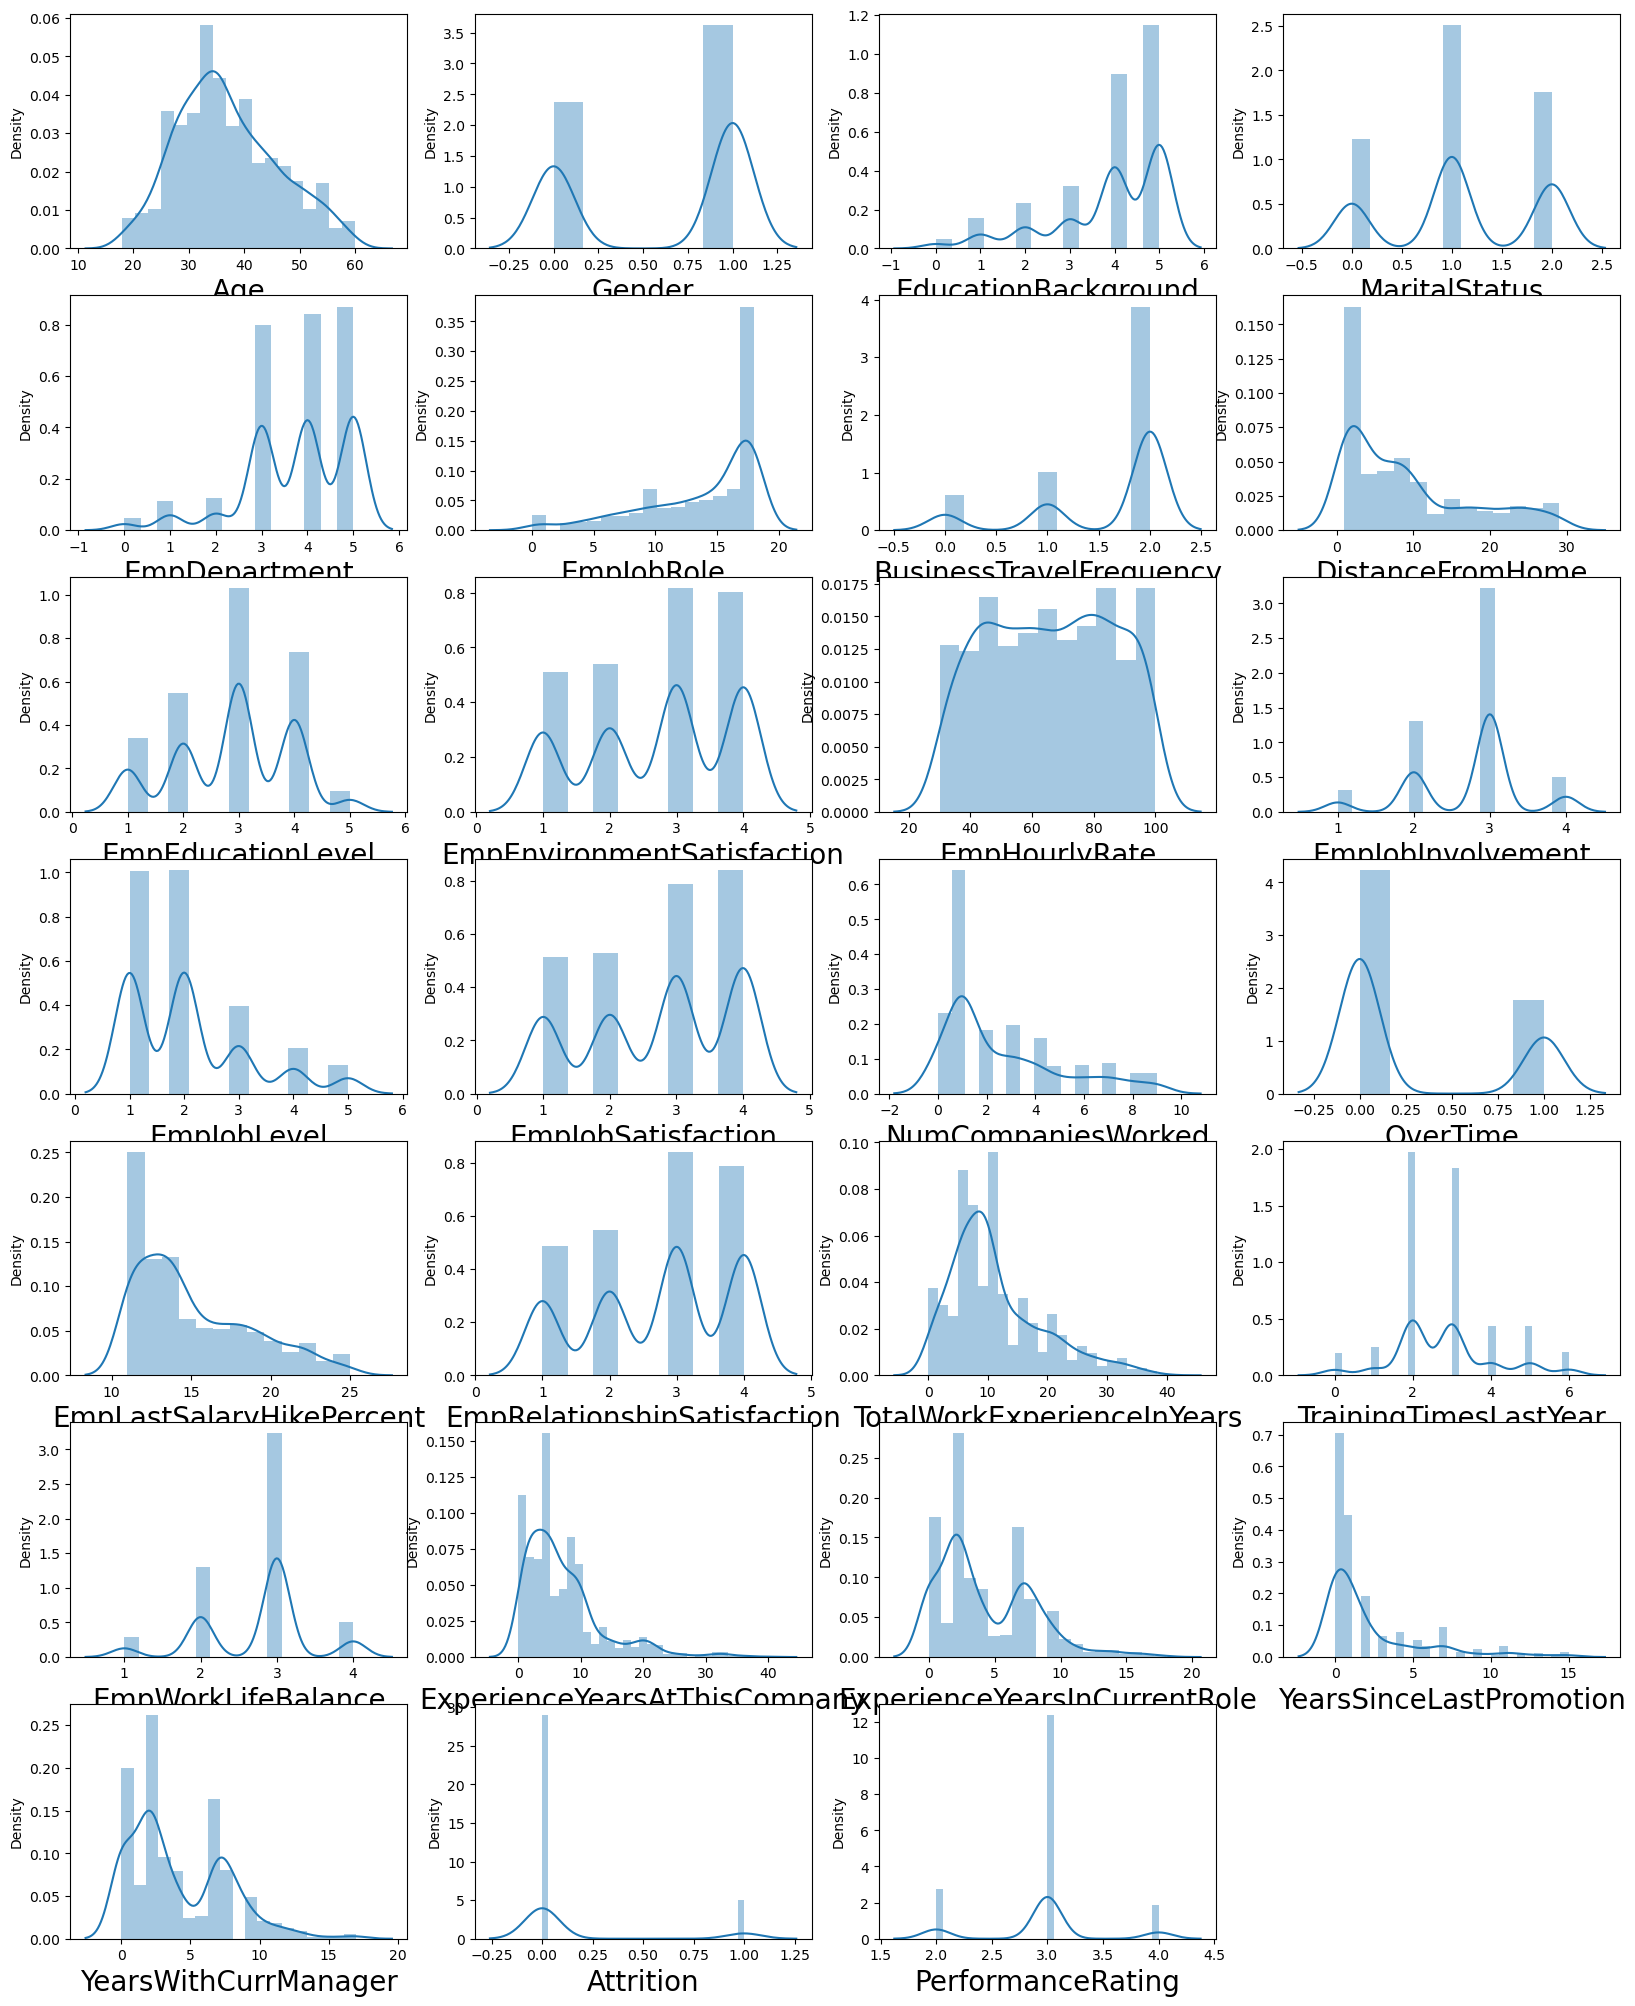

In [48]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1 #maintian count for graph

for column in data:
    if plotnumber<=28 :# as there are 20 columns in the data
        ax = plt.subplot(7,4,plotnumber)# plotting 20 graphs (5-rows,4-columns) ,plotnumber is for count 
        sns.distplot(data[column])#plotting dist plot to know distribution
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

***Observation:Since not all features are having a normal distribution we will use IQR to find the outliers***


### Outlier Analysis


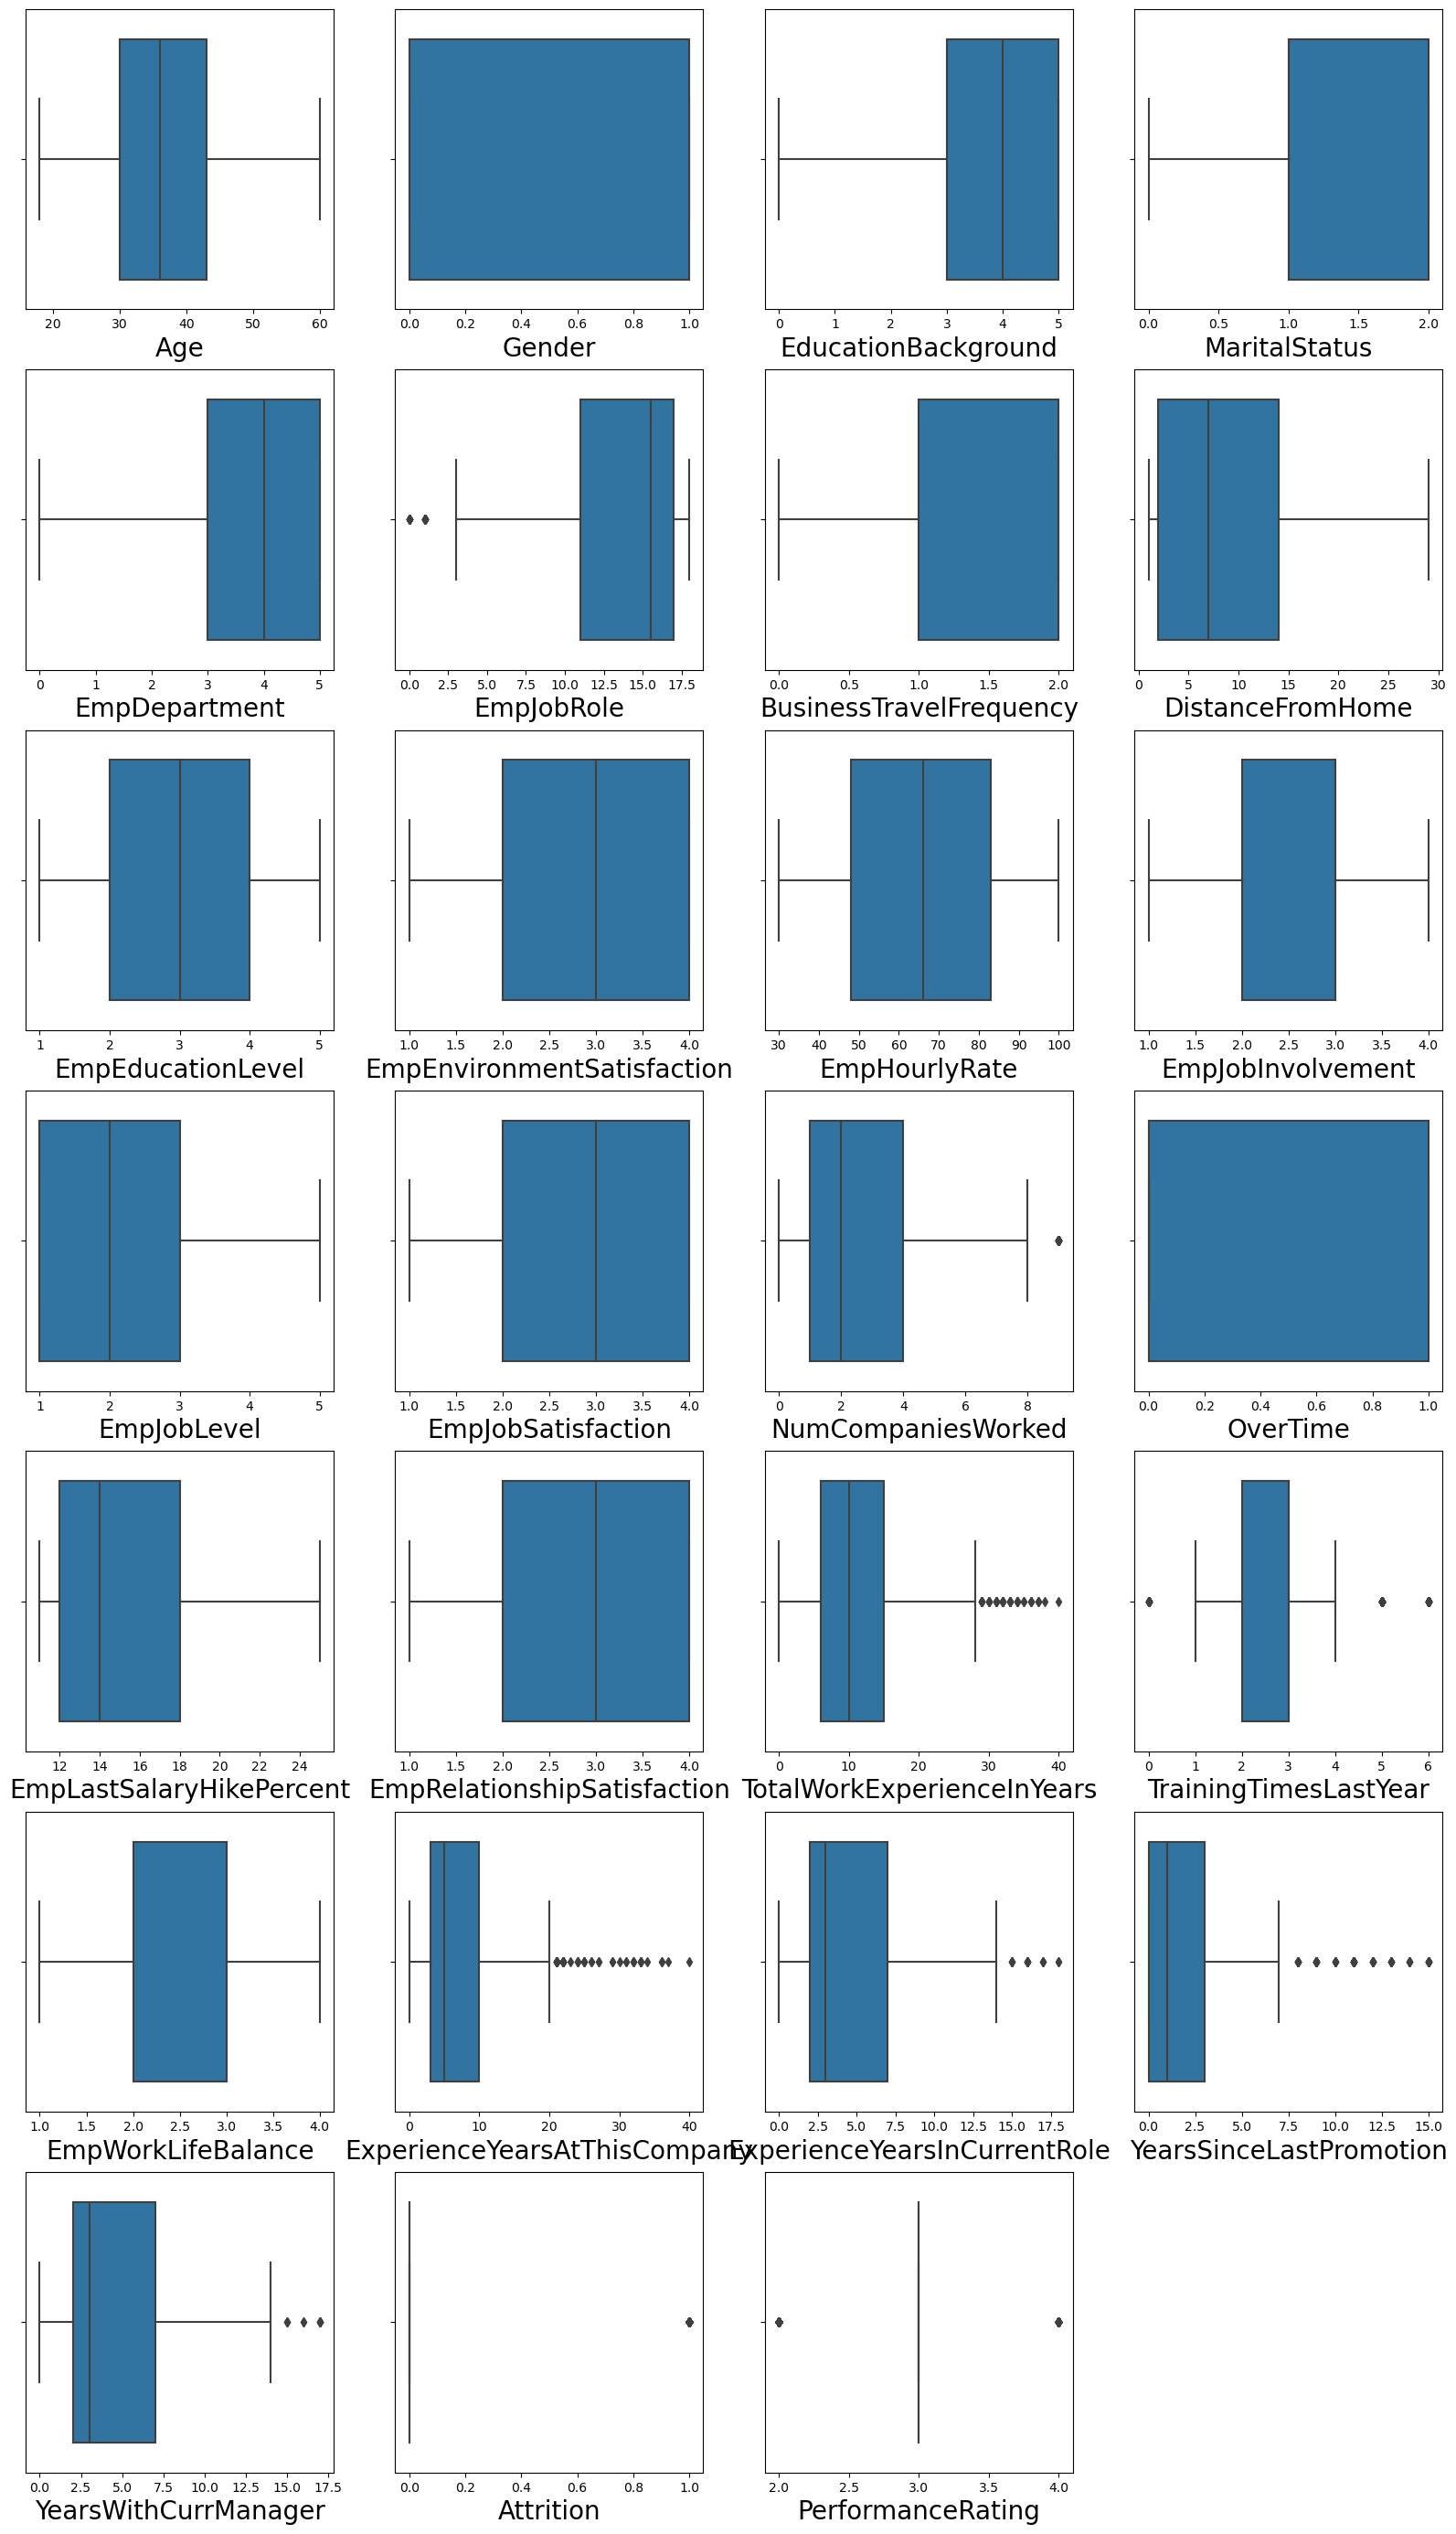

In [49]:
plt.figure(figsize=(20,35), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=28:
        ax = plt.subplot(7,4,plotnumber)
        sns.boxplot(data[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

***Observation:Since all other outliers except the outlier for the feature 'TrainingTimesLastYear' are within 5% limit we are removing outlier of this feature only.***


In [50]:
from scipy import stats

In [51]:
IQR=stats.iqr(data.TrainingTimesLastYear,interpolation='midpoint')
IQR

1.0

In [52]:
Q1=data.TrainingTimesLastYear.quantile(0.25)
Q3=data.TrainingTimesLastYear.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
max_limit

4.5

In [53]:
data.loc[data['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()

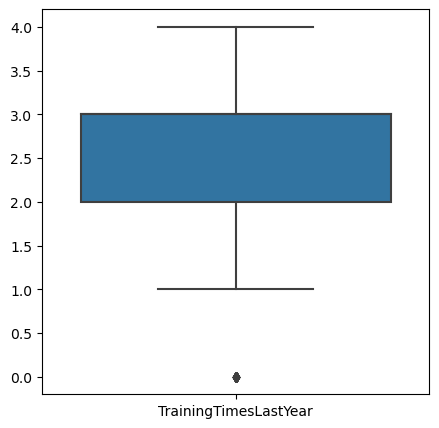

In [54]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data[['TrainingTimesLastYear']])
plt.show()

## Feature Selection

## Checking correlation

<AxesSubplot:>

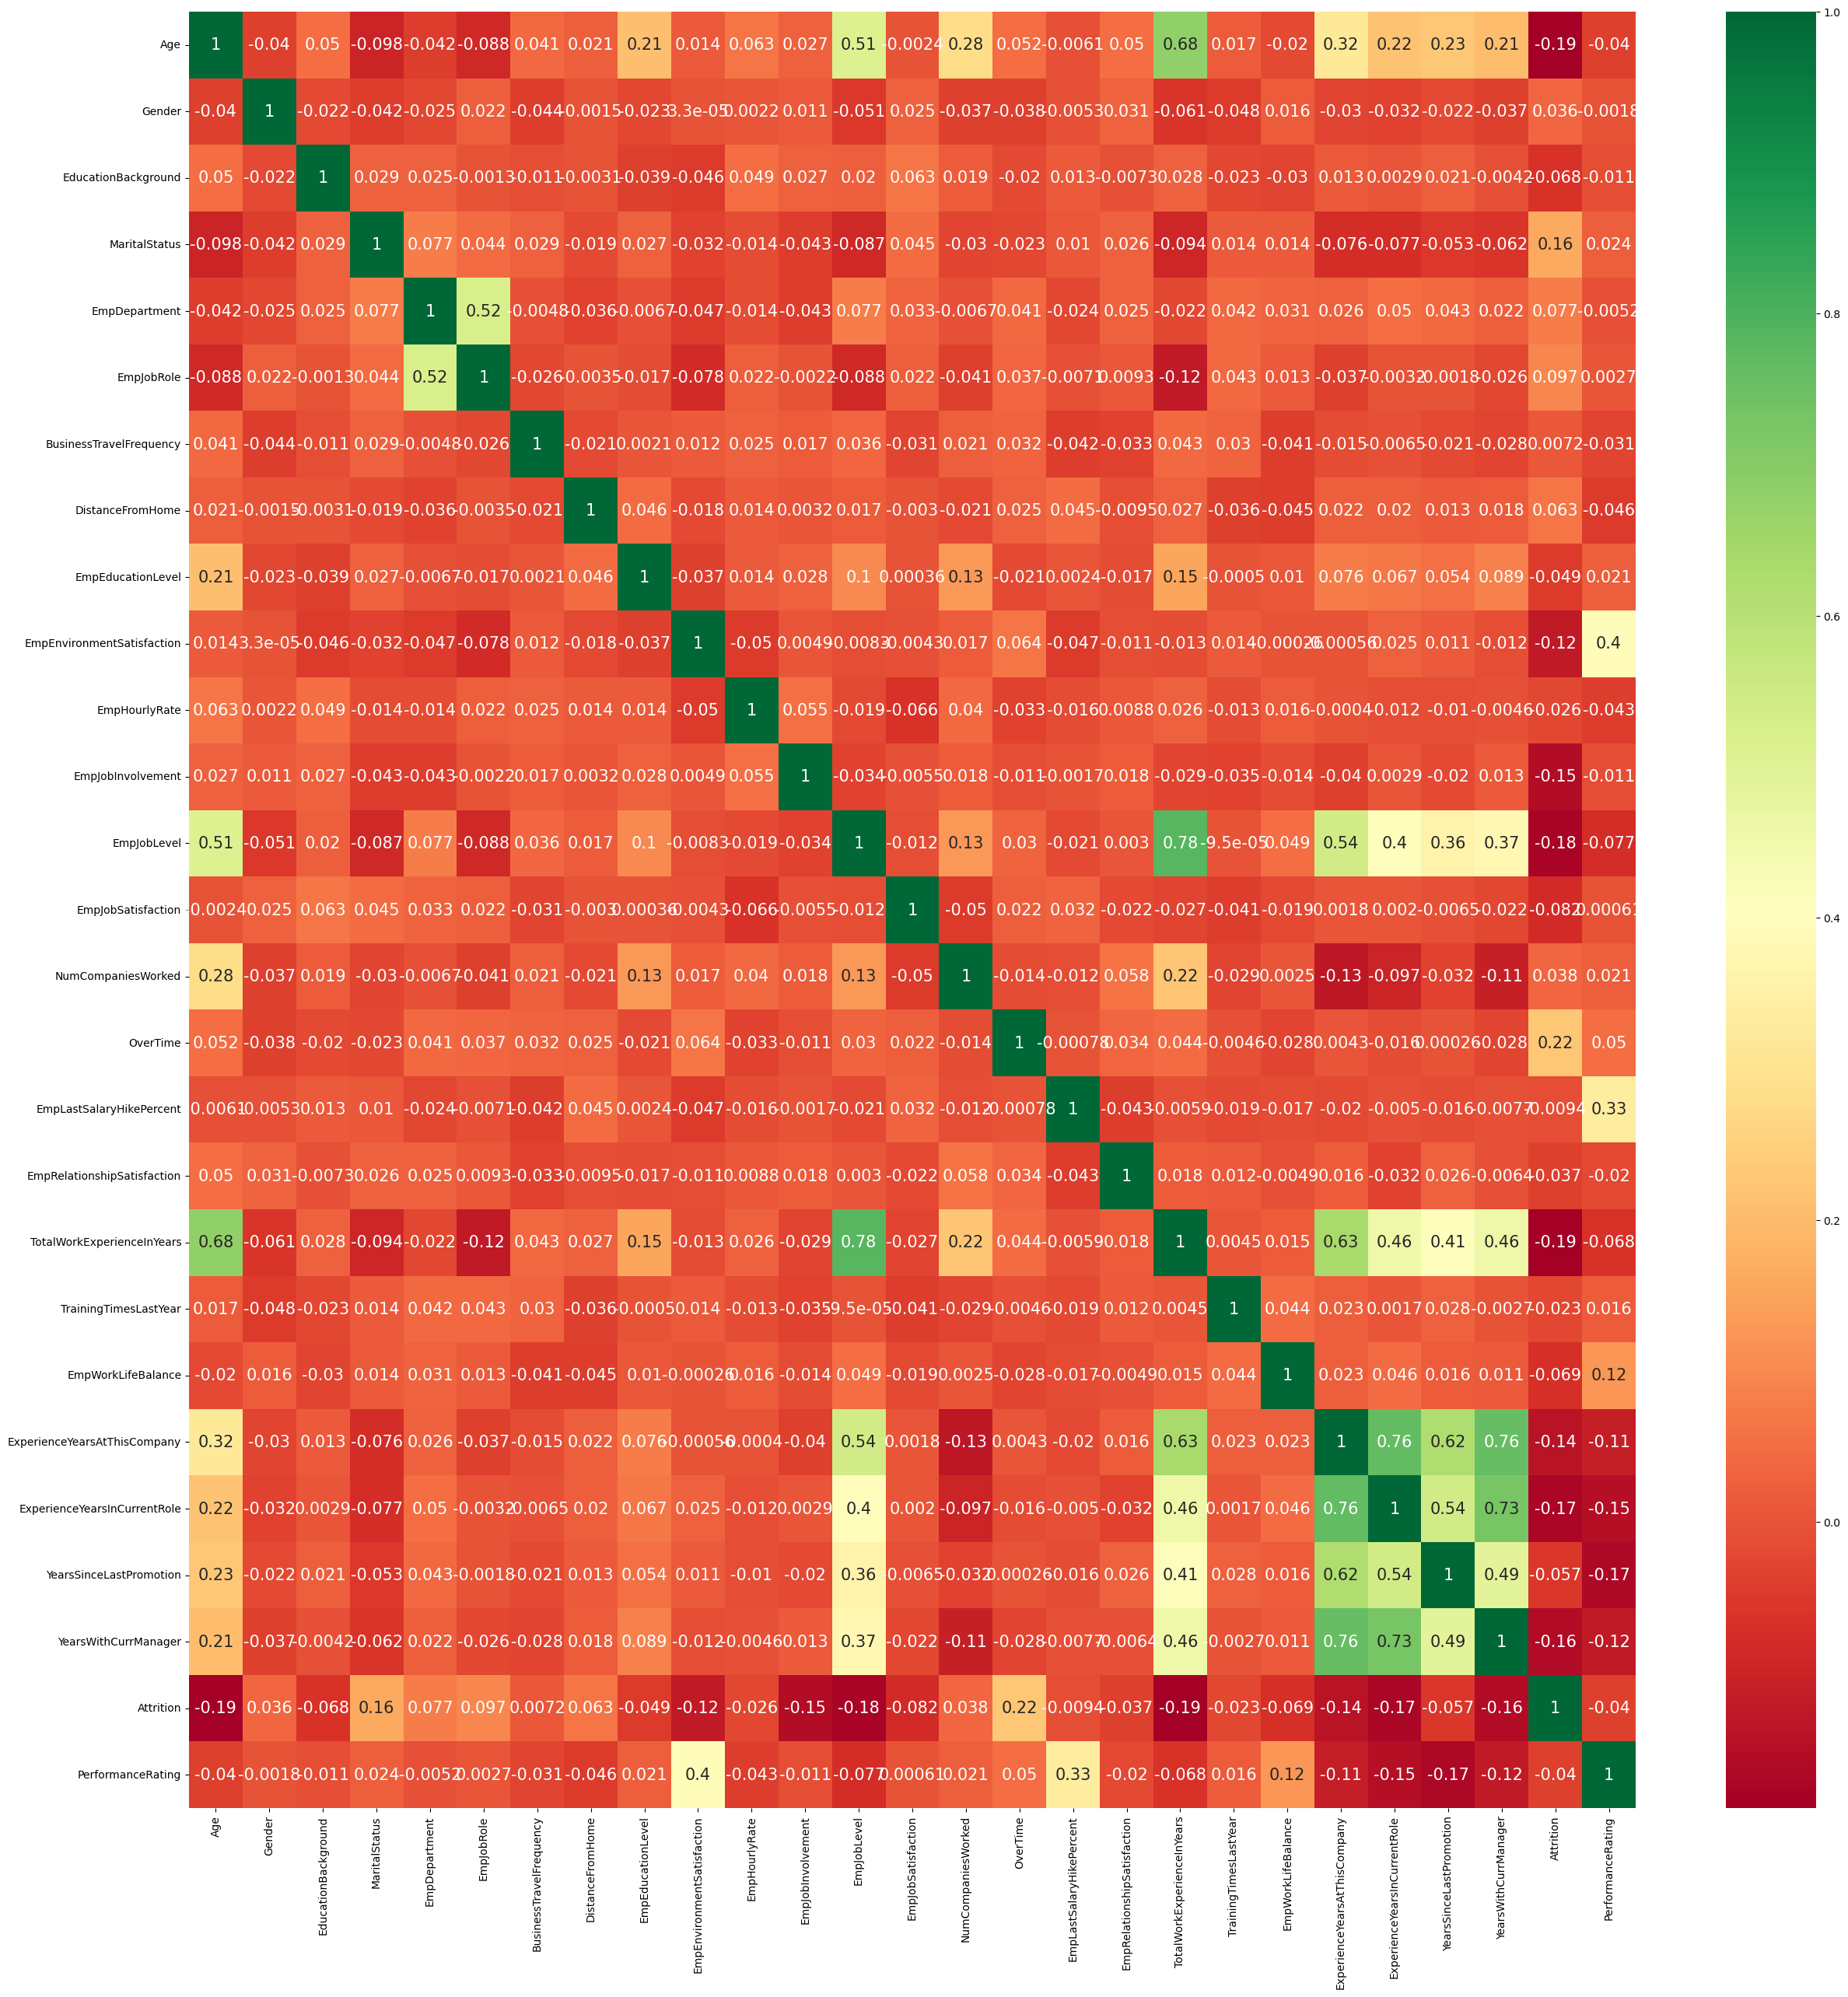

In [55]:
plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15}) # plotting heat map to check correlation

***Observation:None of the features are highly correlated(more than 0.90) thus we are good to go***